### Task-2

___Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.___

In [1]:
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=sns.load_dataset("titanic")   ## load the titanic dataset from seaborn 

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
## check null values 
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
median_age=df['age'].median()   ## fill the null values columns with median 

In [7]:
df['age'].fillna(median_age,inplace=True)

In [8]:
df['age'].isna().sum()

0

In [9]:
# drop all null values there is only 2 and 3 null value in 2 coloums 
df.dropna(inplace=True)

In [10]:
# drop the unsuful coloms 
df.drop(columns=['sibsp','adult_male'],inplace=True)

In [11]:
for col in df.columns:    # unique values of 
    unique_val=df[col].unique()[:10]
    print(f"unique values of {col} is : {unique_val}" )

unique values of survived is : [1 0]
unique values of pclass is : [1 3 2]
unique values of sex is : ['female' 'male']
unique values of age is : [38. 35. 54.  4. 58. 34. 28. 19. 49. 65.]
unique values of parch is : [0 1 2 4]
unique values of fare is : [ 71.2833  53.1     51.8625  16.7     26.55    13.      35.5    263.
 146.5208  76.7292]
unique values of embarked is : ['C' 'S' 'Q']
unique values of class is : ['First', 'Third', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
unique values of who is : ['woman' 'man' 'child']
unique values of deck is : ['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
unique values of embark_town is : ['Cherbourg' 'Southampton' 'Queenstown']
unique values of alive is : ['yes' 'no']
unique values of alone is : [False  True]


In [12]:
cat_col=df.select_dtypes(include="O").columns

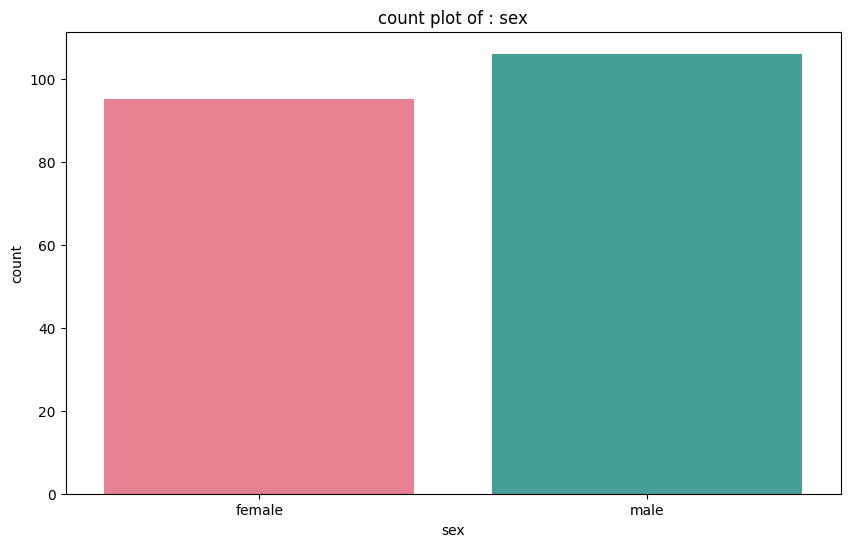

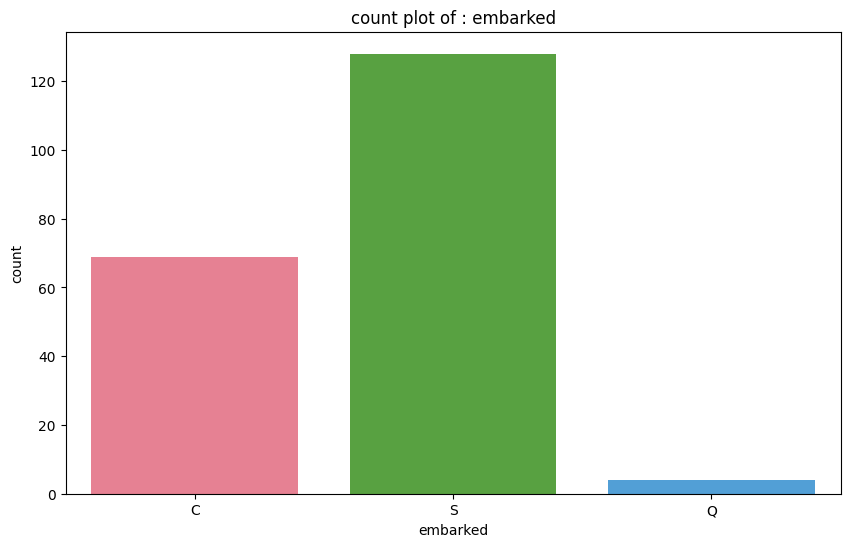

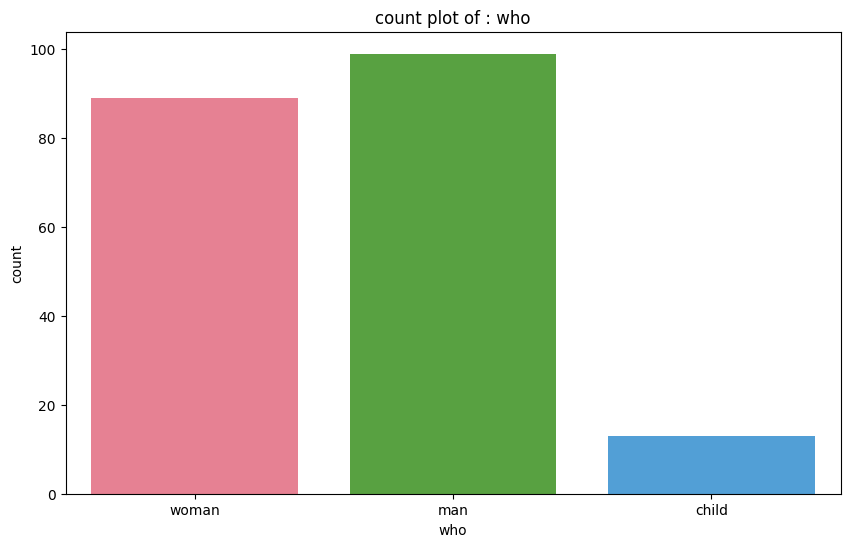

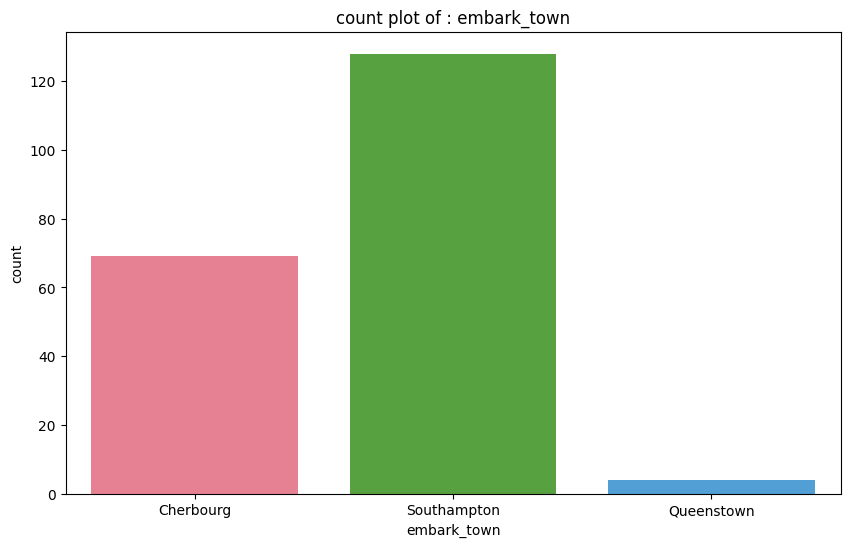

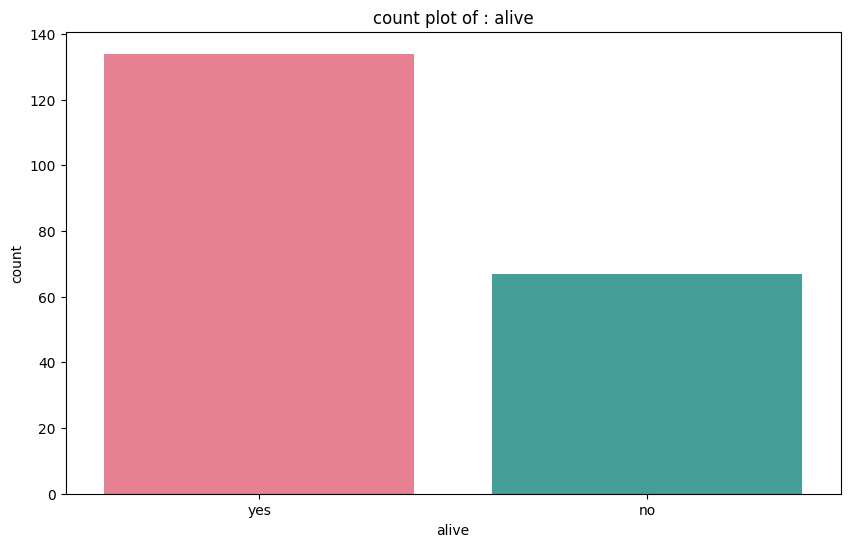

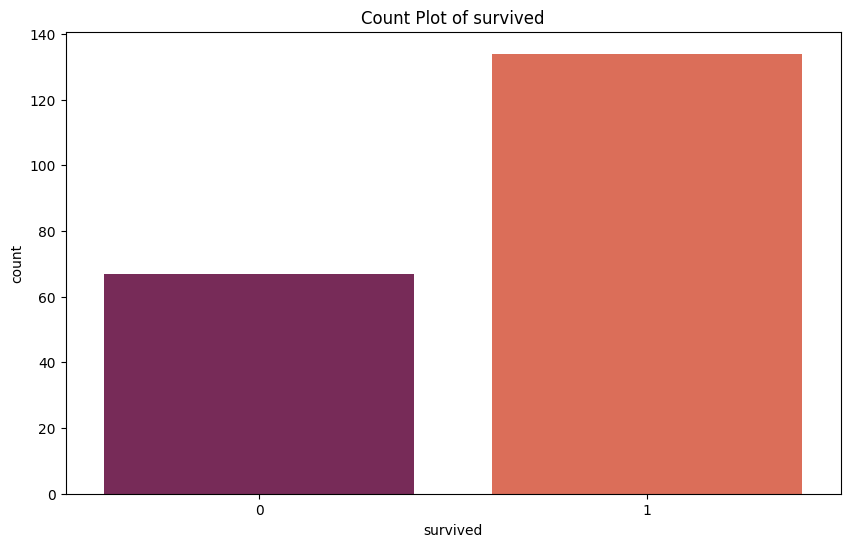

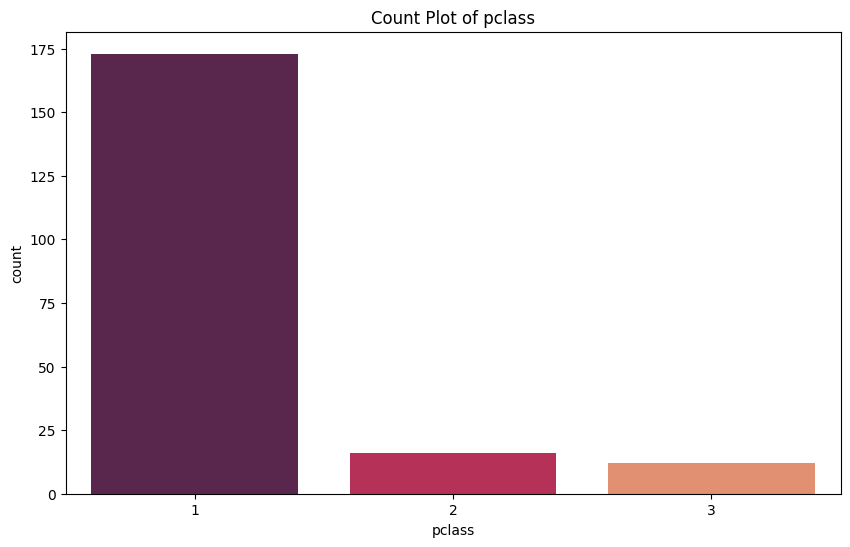

In [13]:
# Loop through each categorical column and create a count plot

for col in cat_col:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col,data=df,palette="husl")
    plt.title(f"count plot of : {col}")
    plt.show()
    
cat_cols = ['survived', 'pclass']

for cols in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cols, data=df,palette="rocket")
    plt.title(f'Count Plot of {cols}')
    plt.show()


Text(0.5, 1.0, 'Percentage of Men, Women, and Children')

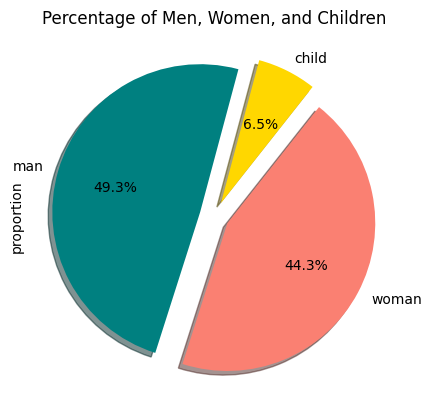

In [14]:
# pie chart for percentage of man ,women,and child

plt.figure()
df['who'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',colors=['Teal', 'Salmon', 'Gold'],startangle=75,explode=(0.1,0.1,0.1),shadow=True)
plt.title("Percentage of Men, Women, and Children")


Text(0.5, 1.0, 'Age distribution by who and survival status.')

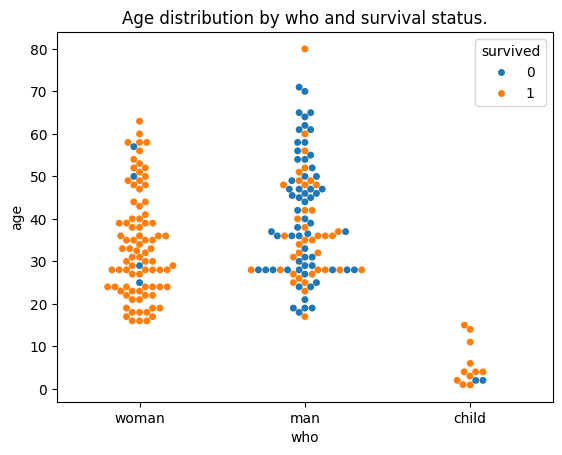

In [15]:
plt.figure()
sns.swarmplot(x='who',y='age',data=df,hue='survived')
plt.title("Age distribution by who and survival status.")

In [16]:
df.groupby('pclass')['age'].mean()  #average age of pansanges who is in p class 1 2 3 

pclass
1    36.661387
2    25.437500
3    22.166667
Name: age, dtype: float64

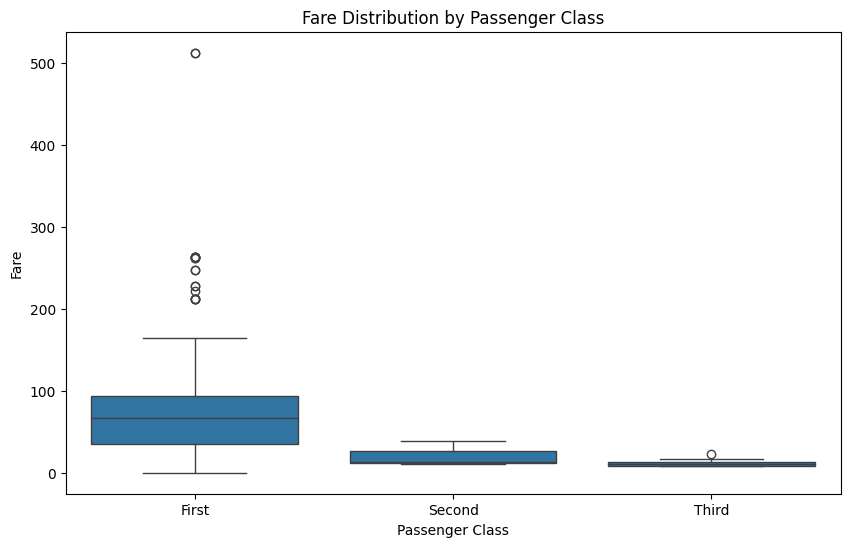

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


In [18]:
# Groupby Operation: Mean Fare by Passenger Class and Survival Status

df.groupby(['pclass','alive'])['fare'].mean()

pclass  alive
1       no       71.128878
        yes      93.760799
2       no       16.458333
        yes      18.433977
3       no        8.604167
        yes      14.793050
Name: fare, dtype: float64

In [19]:
df.groupby('pclass')['alive'].value_counts()

pclass  alive
1       yes      115
        no        58
2       yes       13
        no         3
3       no         6
        yes        6
Name: count, dtype: int64

Text(0.5, 1.0, 'survival status and passenger class with stacked bar chart')

<Figure size 640x480 with 0 Axes>

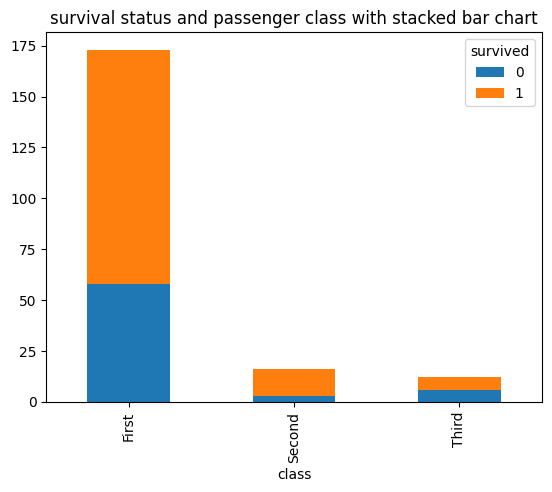

In [20]:
plt.figure()
pd.crosstab(df['class'],df['survived']).plot(kind='bar',stacked=True) 
plt.title('survival status and passenger class with stacked bar chart')
### Crosstab between survival status and passenger class with stacked bar chart

Text(0.5, 1.0, 'bar chart people who survived or not alone ')

<Figure size 1000x600 with 0 Axes>

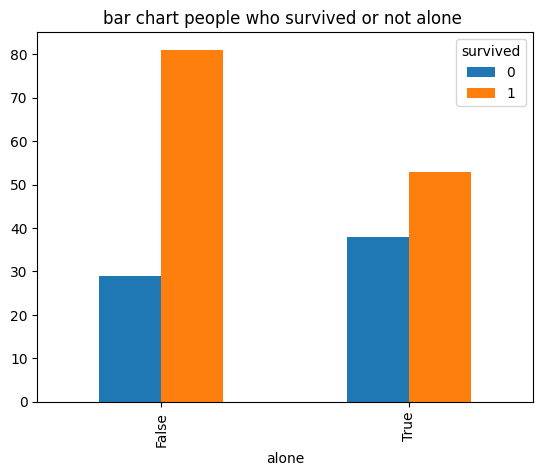

In [21]:
plt.figure(figsize=(10,6))
pd.crosstab(df['alone'],df['survived']).plot(kind='bar')
plt.title("bar chart people who survived or not alone ")

In [22]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'parch', 'fare', 'embarked',
       'class', 'who', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

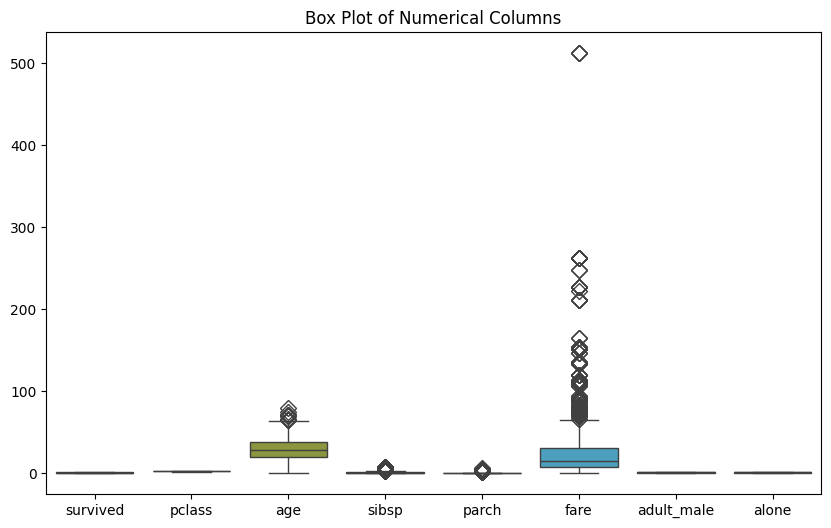

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Select numerical columns
num_col = df.select_dtypes(exclude="O").columns

flierprops = dict(marker='D', color='red', markersize=8)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_col], flierprops=flierprops,palette="husl")
plt.title("Box Plot of Numerical Columns")
plt.show()


In [24]:
# So there is  outlier in fare coloum 

### _data preprocessing_

In [25]:
df.drop('adult_male',axis=1,inplace=True)   #drop the least usefull column becaue here is also a gender column

In [26]:
df['class'].unique() 

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [27]:
# change the class with 1,2,3 numerical value 

In [28]:
# Usning map 
df['class']=df['class'].map({'Third':3,'Second':2,'First':1}).astype(int)
## also change dtype to integer
df['class']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: class, Length: 891, dtype: int32

In [29]:
df['alone']=df['alone'].astype(int) 
## change True False value with 1 and 0 here i chang the dtype to int 
df['alone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: alone, Length: 891, dtype: int32

In [34]:
age_median=df['age'].median()
age_median


28.0

In [ ]:
## fill the age null values with median age 

In [35]:
df['age']=df['age'].fillna(age_median)

In [36]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [54]:
# now for deck use mode to fill the null values 
deck_mode=df['deck'].mode()[0]
deck_mode

'C'

In [55]:
df['deck']=df['deck'].fillna(deck_mode)

In [56]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [57]:
# now there is only 2 ,2 null values in 2 colums so we drop the null values 
df.dropna(inplace=True)

In [60]:
df['deck']  here for 

0      C
1      C
2      C
3      C
4      C
      ..
886    C
887    B
888    C
889    C
890    C
Name: deck, Length: 889, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [62]:
df['deck'].unique() 

['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [65]:
# now we use label encoder to encode deck coloumn
from sklearn.preprocessing import LabelEncoder
endoder=LabelEncoder()

In [67]:
df['Encoded_deck']=endoder.fit_transform(df['deck'])

In [69]:
df.drop('deck',inplace=True,axis=1)

In [72]:
df.rename(columns={'Encoded_deck':'deck'},inplace=True)

<div style="background: linear-gradient(90deg, rgba(63,94,251,1) 0%, rgba(70,230,190,1) 100%); color:white; text-align:center; padding:20px; font-size:24px; font-weight:bold; border-radius:10px; box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3);">
 <br>
    Successfully finished Task 2!
</div>
